In [1]:
import zipfile
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd

users = pd.read_csv('ml-1m/users.dat', sep='::', engine='python', names=['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code'])
users.head()



,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [3]:
ratings = pd.read_csv('ml-1m/ratings.dat', sep='::', engine='python', names=['UserID', 'MovieID','Rating','Timestamp'])
ratings.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [4]:
movies = pd.read_csv('ml-1m/movies.dat', sep='::', engine='python', encoding='ISO-8859-1', names=['MovieID','Title','Genres'])
movies.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
print("Users Data:")
print(users.describe())
print("\nMovies Data:")
print(movies.describe())
print("\nRatings Data:")
print(ratings.describe())


print("\nMissing Values in Users Data:")
print(users.isnull().sum())
print("\nMissing Values in Movies Data:")
print(movies.isnull().sum())
print("\nMissing Values in Ratings Data:")
print(ratings.isnull().sum())

Users Data:
            UserID          Age   Occupation
count  6040.000000  6040.000000  6040.000000
mean   3020.500000    30.639238     8.146854
std    1743.742145    12.895962     6.329511
min       1.000000     1.000000     0.000000
25%    1510.750000    25.000000     3.000000
50%    3020.500000    25.000000     7.000000
75%    4530.250000    35.000000    14.000000
max    6040.000000    56.000000    20.000000

Movies Data:
           MovieID
count  3883.000000
mean   1986.049446
std    1146.778349
min       1.000000
25%     982.500000
50%    2010.000000
75%    2980.500000
max    3952.000000

Ratings Data:
             UserID       MovieID        Rating     Timestamp
count  1.000209e+06  1.000209e+06  1.000209e+06  1.000209e+06
mean   3.024512e+03  1.865540e+03  3.581564e+00  9.722437e+08
std    1.728413e+03  1.096041e+03  1.117102e+00  1.215256e+07
min    1.000000e+00  1.000000e+00  1.000000e+00  9.567039e+08
25%    1.506000e+03  1.030000e+03  3.000000e+00  9.653026e+08
50%    3.07

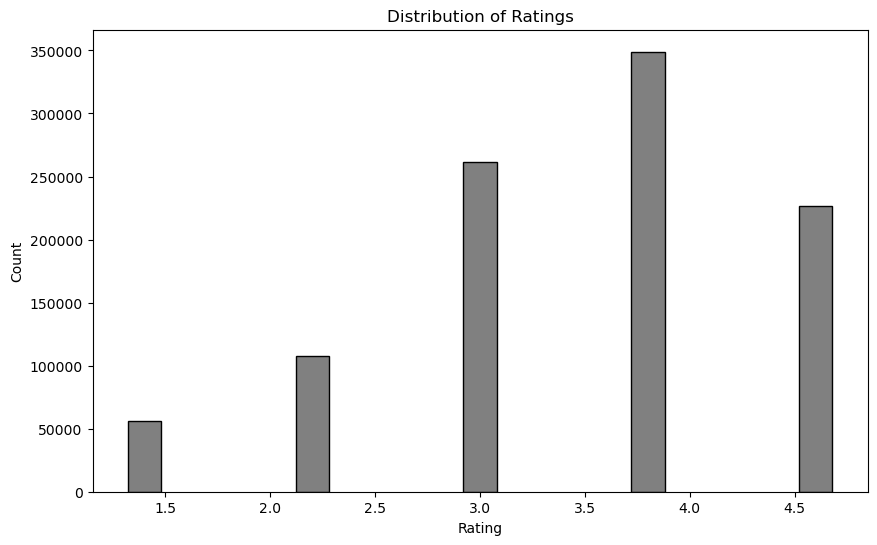

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(ratings['Rating'], bins=5, edgecolor='black', align='mid', rwidth=0.2,color="gray")  # Adjust the rwidth parameter
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Ratings')
plt.show()


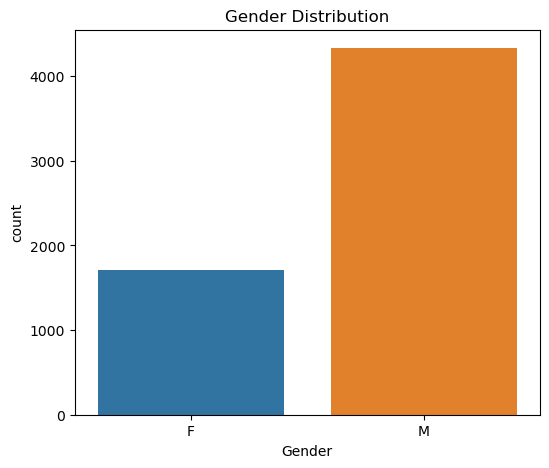

In [8]:
plt.figure(figsize=(6,5))
sns.countplot(data=users, x='Gender')
plt.title('Gender Distribution')
plt.show()


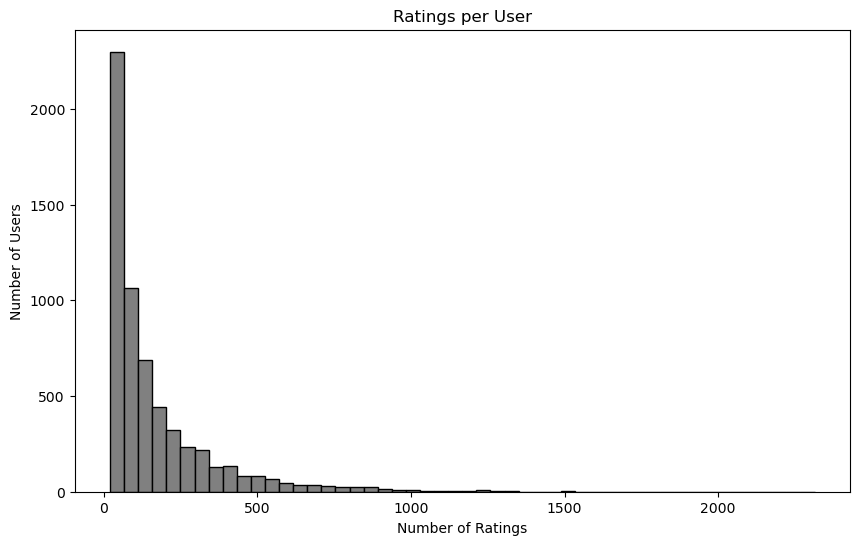

In [9]:
import matplotlib.pyplot as plt

ratings_per_user = ratings.groupby('UserID').size()

plt.figure(figsize=(10, 6))
plt.hist(ratings_per_user, bins=50, edgecolor='black',color="gray")
plt.title('Ratings per User')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Users')
plt.show()


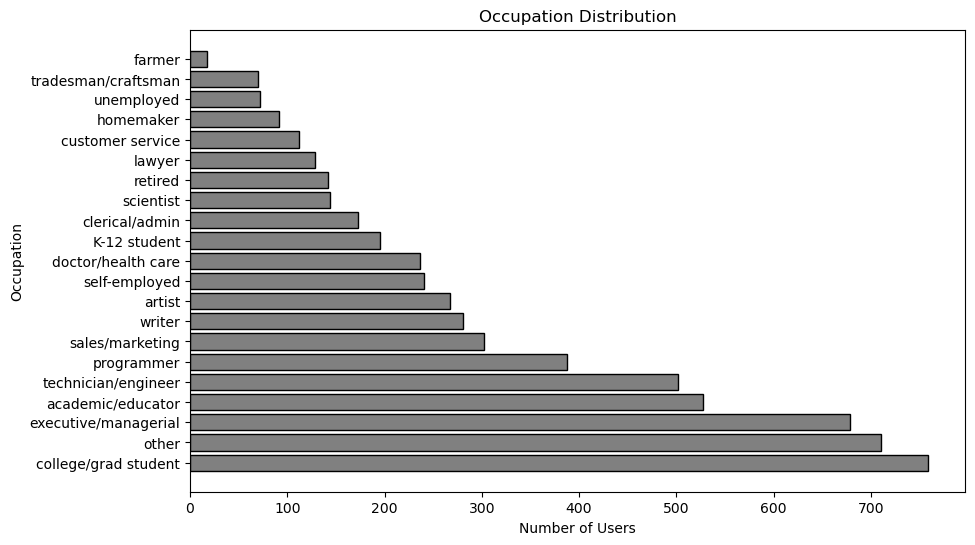

In [10]:
import matplotlib.pyplot as plt

occupation_map = {
    0: "other", 1: "academic/educator", 2: "artist", 3: "clerical/admin", 4: "college/grad student",
    5: "customer service", 6: "doctor/health care", 7: "executive/managerial", 8: "farmer",
    9: "homemaker", 10: "K-12 student", 11: "lawyer", 12: "programmer", 13: "retired",
    14: "sales/marketing", 15: "scientist", 16: "self-employed", 17: "technician/engineer",
    18: "tradesman/craftsman", 19: "unemployed", 20: "writer"
}

users['Occupation_name'] = users['Occupation'].map(occupation_map)

plt.figure(figsize=(10, 6))
plt.barh(users['Occupation_name'].value_counts().index, users['Occupation_name'].value_counts(),edgecolor='black',color="gray")
plt.title('Occupation Distribution')
plt.xlabel('Number of Users')
plt.ylabel('Occupation')
plt.show()


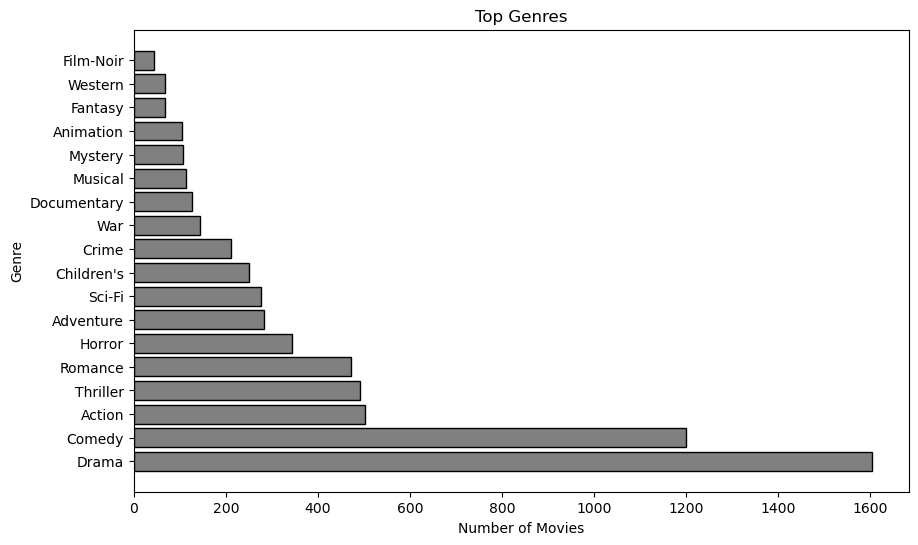

In [11]:
import matplotlib.pyplot as plt

all_genres = movies['Genres'].str.split('|', expand=True).stack().reset_index(drop=True)

plt.figure(figsize=(10, 6))
plt.barh(all_genres.value_counts().index, all_genres.value_counts(), edgecolor='black',color="gray")
plt.title('Top Genres')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.show()


In [12]:
movie_stats = ratings.groupby('MovieID').agg({'Rating': [np.size, np.mean]})
top_rated_movies = movie_stats['Rating'][(movie_stats['Rating']['size'] >= 500)].sort_values(by='mean', ascending=False).merge(movies, left_index=True, right_on='MovieID')
top_rated_movies[['Title', 'mean', 'size']].head(10)


,Title,mean,size
1950,Seven Samurai (The Magnificent Seven) (Shichin...,4.560510,628
315,"Shawshank Redemption, The (1994)",4.554558,2227
847,"Godfather, The (1972)",4.524966,2223
735,"Close Shave, A (1995)",4.520548,657
49,"Usual Suspects, The (1995)",4.517106,1783
523,Schindler's List (1993),4.510417,2304
1132,"Wrong Trousers, The (1993)",4.507937,882
1180,Raiders of the Lost Ark (1981),4.477725,2514
892,Rear Window (1954),4.476190,1050
257,Star Wars: Episode IV - A New Hope (1977),4.453694,2991


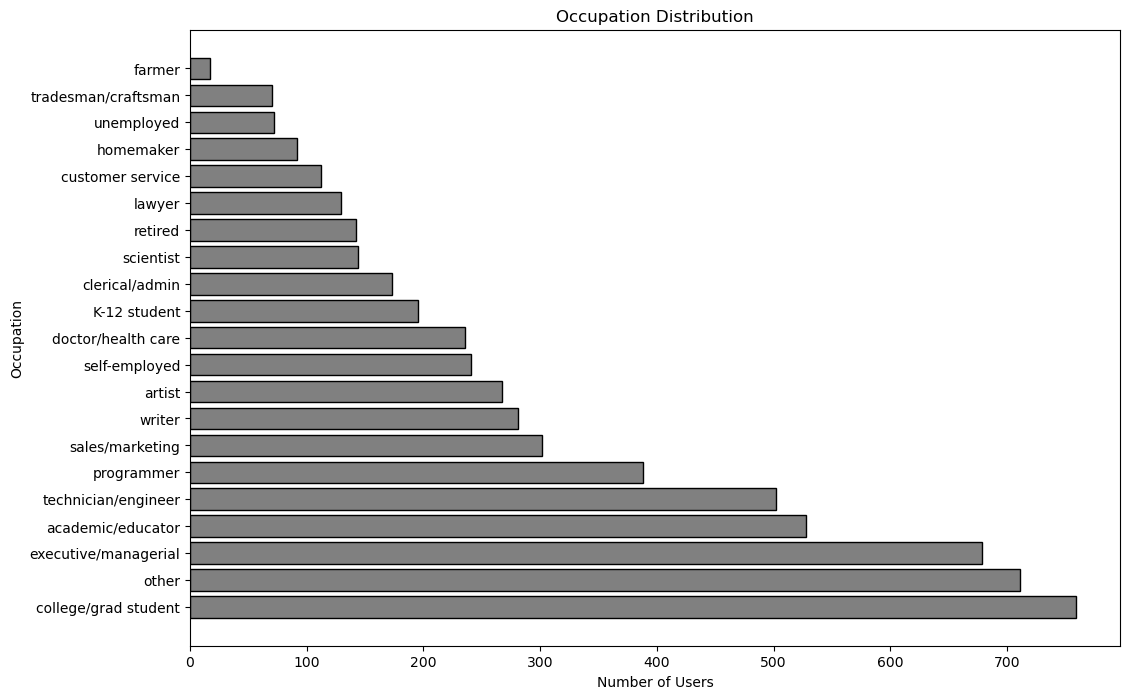

In [13]:
import matplotlib.pyplot as plt

occupation_map = {
    0: "other", 1: "academic/educator", 2: "artist", 3: "clerical/admin", 4: "college/grad student",
    5: "customer service", 6: "doctor/health care", 7: "executive/managerial", 8: "farmer",
    9: "homemaker", 10: "K-12 student", 11: "lawyer", 12: "programmer", 13: "retired",
    14: "sales/marketing", 15: "scientist", 16: "self-employed", 17: "technician/engineer",
    18: "tradesman/craftsman", 19: "unemployed", 20: "writer"
}

users['Occupation_name'] = users['Occupation'].map(occupation_map)

plt.figure(figsize=(12, 8))
plt.barh(users['Occupation_name'].value_counts().index, users['Occupation_name'].value_counts(),edgecolor='black',color="gray")
plt.title('Occupation Distribution')
plt.xlabel('Number of Users')
plt.ylabel('Occupation')
plt.show()


In [14]:
user_ratings = pd.merge(ratings, users)
gender_avg_ratings = user_ratings.groupby(['MovieID', 'Gender']).mean().unstack()['Rating']
gender_avg_ratings = gender_avg_ratings.merge(movies, left_index=True, right_on='MovieID')
gender_avg_ratings[['Title', 'M', 'F']].head(10)

,Title,M,F
0,Toy Story (1995),4.130552,4.187817
1,Jumanji (1995),3.175238,3.278409
2,Grumpier Old Men (1995),2.994152,3.073529
3,Waiting to Exhale (1995),2.482353,2.976471
4,Father of the Bride Part II (1995),2.888298,3.212963
5,Heat (1995),3.909988,3.682171
6,Sabrina (1995),3.267717,3.588235
7,Tom and Huck (1995),2.775000,3.357143
8,Sudden Death (1995),2.717391,2.100000
9,GoldenEye (1995),3.553050,3.470149


In [15]:
age_avg_ratings = user_ratings.groupby(['MovieID', 'Age']).mean().unstack()['Rating']
age_avg_ratings = age_avg_ratings.merge(movies, left_index=True, right_on='MovieID')
age_avg_ratings[['Title', 1, 18, 25, 35, 45, 50, 56]].head(10)  # Considering standard age groups in the dataset


,Title,1,18,25,35,45,50,56
0,Toy Story (1995),3.919643,4.017857,4.201266,4.302600,4.104895,4.092593,3.886792
1,Jumanji (1995),3.388889,2.993506,3.145594,3.307692,3.480769,3.355556,3.500000
2,Grumpier Old Men (1995),3.500000,3.084112,2.971591,2.962963,3.181818,2.818182,2.933333
3,Waiting to Exhale (1995),3.333333,2.512821,2.727273,2.714286,3.083333,3.142857,2.750000
4,Father of the Bride Part II (1995),3.400000,2.861538,2.940171,3.155172,3.000000,3.050000,3.666667
5,Heat (1995),3.904762,4.027149,3.911058,3.759494,3.711111,3.576923,3.703704
6,Sabrina (1995),3.428571,3.500000,3.311111,3.489583,3.439024,3.612903,3.227273
7,Tom and Huck (1995),3.166667,2.760000,2.923077,3.600000,3.333333,2.666667,3.000000
8,Sudden Death (1995),2.666667,2.741935,2.365854,2.937500,2.833333,3.000000,4.000000
9,GoldenEye (1995),4.022727,3.560185,3.435616,3.581560,3.563636,3.666667,3.526316


In [16]:
users = users.drop_duplicates()
movies = movies.drop_duplicates()
ratings = ratings.drop_duplicates()

In [17]:
print("Users shape:", users.shape)
print("Movies shape:", movies.shape)
print("Ratings shape:", ratings.shape)

Users shape: (6040, 6)
Movies shape: (3883, 3)
Ratings shape: (1000209, 4)


In [18]:
import torch
from torch.utils.data import Dataset, DataLoader

class ClientDataset(Dataset):
    def __init__(self, users, movies, ratings):

        self.data = ratings.merge(users, on='UserID').merge(movies, on='MovieID')

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        row = self.data.iloc[idx]
        return (
            row['UserID'],
            row['MovieID'],
            torch.tensor(mlb.transform([row['Genres'].split('|')])[0], dtype=torch.float),
            torch.tensor(occupation_encoder.transform([[row['Occupation']]])[0], dtype=torch.float),
            torch.tensor(row['Age_encoded'], dtype=torch.long),
            row['Gender_encoded'],
            row['Rating']
        )

In [19]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
genres_encoded = mlb.fit_transform(movies['Genres'].str.split('|'))
genres_df = pd.DataFrame(genres_encoded, columns=mlb.classes_, index=movies.index)


occupation_encoder = OneHotEncoder(sparse=False)
occupations_encoded = occupation_encoder.fit_transform(users[['Occupation']])
occupations_df = pd.DataFrame(occupations_encoded, columns=occupation_encoder.get_feature_names_out(['Occupation']), index=users.index)

gender_encoder = LabelEncoder()
users['Gender_encoded'] = gender_encoder.fit_transform(users['Gender'])


age_encoder = LabelEncoder()
users['Age_encoded'] = age_encoder.fit_transform(users['Age'])


In [20]:
import torch.nn as nn
import torch.nn.functional as F

class ExpandedRecommender(nn.Module):
    def __init__(self, num_users, num_movies, embedding_dim, num_genres, num_occupations, num_ages, num_genders=2):
        super(ExpandedRecommender, self).__init__()


        self.user_embedding = nn.Embedding(num_users, embedding_dim)
        self.movie_embedding = nn.Embedding(num_movies + 1, embedding_dim)
        self.age_embedding = nn.Embedding(num_ages, embedding_dim)
        self.gender_embedding = nn.Embedding(2,embedding_dim)

        self.genre_layer = nn.Linear(num_genres, embedding_dim)
        self.occupation_layer = nn.Linear(num_occupations, embedding_dim)


        self.fc1 = nn.Linear(embedding_dim * 6, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 1)

    def forward(self, user_ids, movie_ids, genres, occupations, ages, genders):
        user_embedded = self.user_embedding(user_ids)
        movie_embedded = self.movie_embedding(movie_ids)
        age_embedded = self.age_embedding(ages)
        gender_embedded = self.gender_embedding(genders)


        genres = genres.float()
        occupations = occupations.float()

        genre_embedded = F.relu(self.genre_layer(genres))
        occupation_embedded = F.relu(self.occupation_layer(occupations))

        x = torch.cat((user_embedded, movie_embedded, genre_embedded, occupation_embedded, age_embedded, gender_embedded), 1)

        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)

        return x.squeeze()


In [21]:
from sklearn.model_selection import train_test_split

all_train_data, test_data = train_test_split(ratings, test_size=0.1, random_state=42)

num_clients = 10
client_data_split = np.array_split(all_train_data, num_clients)
client_datasets = [ClientDataset(users, movies, data) for data in client_data_split]
client_loaders = [DataLoader(dataset, batch_size=256, shuffle=True) for dataset in client_datasets]

test_dataset = ClientDataset(users, movies, test_data)
test_loader = DataLoader(test_dataset, batch_size=256, shuffle=False)

In [22]:
all_train_data

,UserID,MovieID,Rating,Timestamp
647085,3894,2750,1,965791718
130254,843,2791,4,975358667
232200,1408,2006,2,974762606
61200,412,3301,3,976651610
477192,2929,832,4,971642889
...,...,...,...,...
259178,1586,1077,5,974735719
365838,2129,2700,5,974643199
131932,854,3102,3,975355597
671155,4033,3479,5,965525805


In [23]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
from collections import OrderedDict
import copy

In [24]:
print("Max UserID in Train:", all_train_data['UserID'].max())
print("Max UserID in Test:", test_data['UserID'].max())
print("Max MovieID in Train:", all_train_data['MovieID'].max())
print("Max MovieID in Test:", test_data['MovieID'].max())

Max UserID in Train: 6040
Max UserID in Test: 6040
Max MovieID in Train: 3952
Max MovieID in Test: 3952


In [25]:
print("Max UserID in Train:", all_train_data['UserID'].max())
print("Max MovieID in Train:", all_train_data['MovieID'].max())

print("Max UserID in Test:", test_data['UserID'].max())
print("Max MovieID in Test:", test_data['MovieID'].max())

Max UserID in Train: 6040
Max MovieID in Train: 3952
Max UserID in Test: 6040
Max MovieID in Test: 3952


In [26]:
import os

model_dir = './saved_models'
if not os.path.exists(model_dir):
    os.makedirs(model_dir)

In [27]:
import copy
import os
import torch
import torch.nn as nn
from collections import OrderedDict
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error,r2_score,mean_squared_error,mean_squared_log_error
import numpy as np

def rmse_score(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))



def average_weights(client_models):
    average_model_weights = OrderedDict()
    for k in client_models[0].state_dict().keys():
        average_model_weights[k] = torch.stack([client_models[i].state_dict()[k].float() for i in range(num_clients)], 0).mean(0)
    return average_model_weights


global_model = ExpandedRecommender(
    num_users=users['UserID'].max()+1,
    num_movies=ratings['MovieID'].max()+1,
    embedding_dim=50,
    num_genres=len(mlb.classes_),
    num_occupations=len(occupation_encoder.categories_[0]),
    num_ages=len(age_encoder.classes_)+1
).to(device)

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(global_model.parameters(), lr=0.001)
epochs = 1
rounds = 1
num_clients = 10


client_losses = {i: [] for i in range(num_clients)}
global_losses = []

client_accuracies = {i: [] for i in range(num_clients)}
global_accuracies = []

client_mae = {i: [] for i in range(num_clients)}
global_maes = []

acc = []
c_loss = []
model_dir = 'model_dir'
if not os.path.exists(model_dir):
    os.makedirs(model_dir)

for round in range(rounds):
    client_models = [copy.deepcopy(global_model) for _ in range(num_clients)]
    for client in range(num_clients):
        optimizer = torch.optim.Adam(client_models[client].parameters(), lr=0.001)
        los = []
        for epoch in range(epochs):
            client_models[client].train()
            running_loss = 0.0
            
            for batch_data in client_loaders[client]:
                user_ids, movie_ids, genres, occupations, ages, genders, rating = [item.to(device) for item in batch_data]
                optimizer.zero_grad()
                outputs = client_models[client](user_ids, movie_ids, genres, occupations, ages, genders)
                loss = criterion(outputs, rating.float())
                loss.backward()
                optimizer.step()
                running_loss += loss.item()

            epoch_loss = running_loss / len(client_loaders[client])
            print(f"Client {client+1} - Epoch {epoch+1}, Loss: {epoch_loss:.4f}")
            client_losses[client].append(epoch_loss)
            los.append(epoch_loss)
            
            torch.save(client_models[client].state_dict(), os.path.join(model_dir, f'client_{client+1}_round_{round+1}.pth'))
        c_loss.append(los)
    for client in range(num_clients):
        predictions = []
        true_labels = []
        client_models[client].eval()  # Set model to evaluation mode
        with torch.no_grad():
            for data in client_loaders[client]:
                user_ids, movie_ids, genres, occupations, ages, genders, rating = [item.to(device) for item in data]
                outputs = client_models[client](user_ids, movie_ids, genres, occupations, ages, genders)
                predictions.extend(outputs.cpu().numpy())
                true_labels.extend(rating.cpu().numpy())

        mae = mean_absolute_error(true_labels, predictions)
        a = mean_absolute_percentage_error(true_labels,predictions)
        b = r2_score(true_labels,predictions)
        c = mean_squared_error(true_labels,predictions)
        d = rmse_score(true_labels,predictions)
        #e = mean_squared_log_error(true_labels,predictions)
        acc.append([mae,a,b,c,d])
        client_mae[client].append(mae)
    global_weights = average_weights(client_models)
    global_model.load_state_dict(global_weights)

    predictions = []
    true_labels = []
    global_model.eval()
    with torch.no_grad():
        for batch_data in test_loader:
            user_ids, movie_ids, genres, occupations, ages, genders, rating = [item.to(device) for item in batch_data]
            outputs = global_model(user_ids, movie_ids, genres, occupations, ages, genders)
            predictions.extend(outputs.cpu().numpy())
            true_labels.extend(rating.cpu().numpy())

    global_mae = mean_absolute_error(true_labels, predictions)
    global_maes.append(global_mae)
    print(f"After Round {round+1}, Global Model Test MAE: {global_mae:.4f}")

Client 1 - Epoch 1, Loss: 1.4141
Client 2 - Epoch 1, Loss: 1.3991
Client 3 - Epoch 1, Loss: 1.3933
Client 4 - Epoch 1, Loss: 1.4120
Client 5 - Epoch 1, Loss: 1.4034
Client 6 - Epoch 1, Loss: 1.4066
Client 7 - Epoch 1, Loss: 1.4069
Client 8 - Epoch 1, Loss: 1.4060
Client 9 - Epoch 1, Loss: 1.3988
Client 10 - Epoch 1, Loss: 1.4065
After Round 1, Global Model Test MAE: 0.8685


In [28]:
acc

[[0.8612705252467967,
  0.34193676649287497,
  0.12144344369359805,
  1.110640855932279,
  1.0538694681659009],
 [0.8445571179107567,
  0.3397984378119983,
  0.12883306341073697,
  1.0839263934684407,
  1.0411178576263307],
 [0.838203499061559,
  0.341737368883331,
  0.13082186928405204,
  1.0780160133445673,
  1.038275499732401],
 [0.8430044456761365,
  0.3487327746096592,
  0.12351530314351233,
  1.0945597702470862,
  1.0462121057639728],
 [0.8378600290384465,
  0.35227289194779227,
  0.118944736897179,
  1.099636396585302,
  1.0486354927167505],
 [0.8565342715838025,
  0.33510564703179396,
  0.12085409093250576,
  1.0959975772615005,
  1.046899029162555],
 [0.8503499927781791,
  0.33967661728709553,
  0.12286571494352427,
  1.093216414146902,
  1.0455698992161653],
 [0.8440249967019411,
  0.3406876477035149,
  0.13067513366610162,
  1.0859789283246655,
  1.0421031274901085],
 [0.8584430126976577,
  0.3389785991187125,
  0.11223914054562167,
  1.1058870209059812,
  1.0516116302637497

In [38]:
data = [acc, c_loss]
data = list(map(list, zip(*data)))
column_names = ['Accuracy', 'Train Losses']
df1 = pd.DataFrame(data, columns=column_names)
df1.to_csv('results_ff.csv')

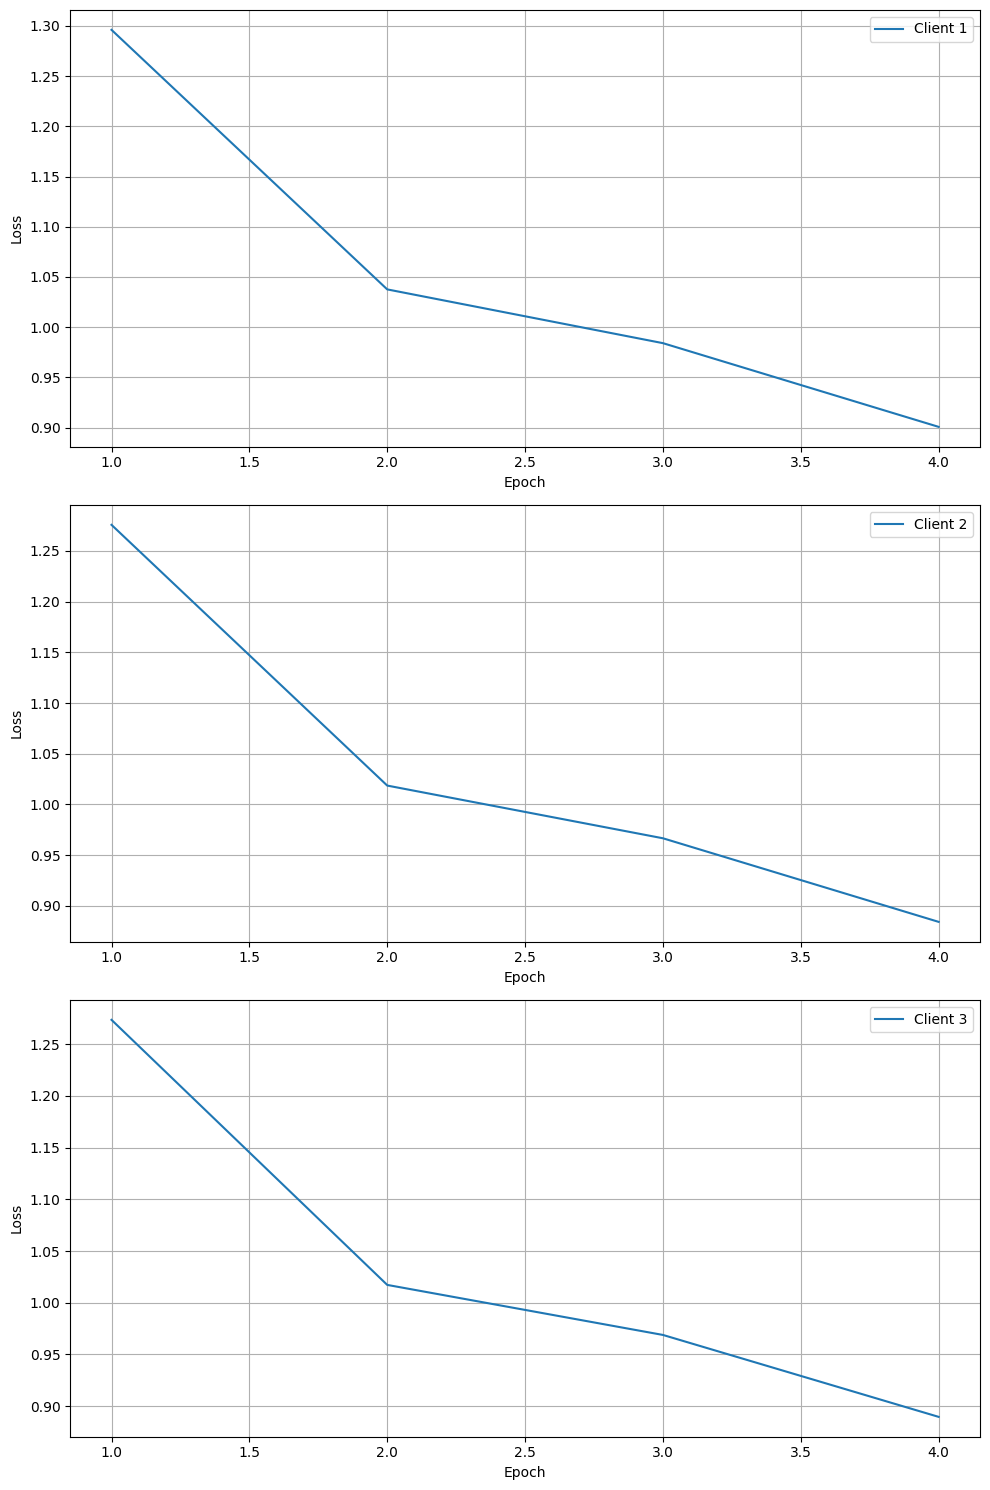

In [ ]:
fig, axs = plt.subplots(num_clients, 1, figsize=(10, 5 * num_clients))
for client, losses in client_losses.items():
    if not losses:
        print(f"No losses recorded for client {client + 1}. Skipping...")
        continue
    axs[client].plot(range(1, epochs * rounds + 1), losses, label=f'Client {client + 1}')
    axs[client].set(xlabel='Epoch', ylabel='Loss')
    axs[client].legend()
    axs[client].grid(True)
plt.tight_layout()
plt.show()


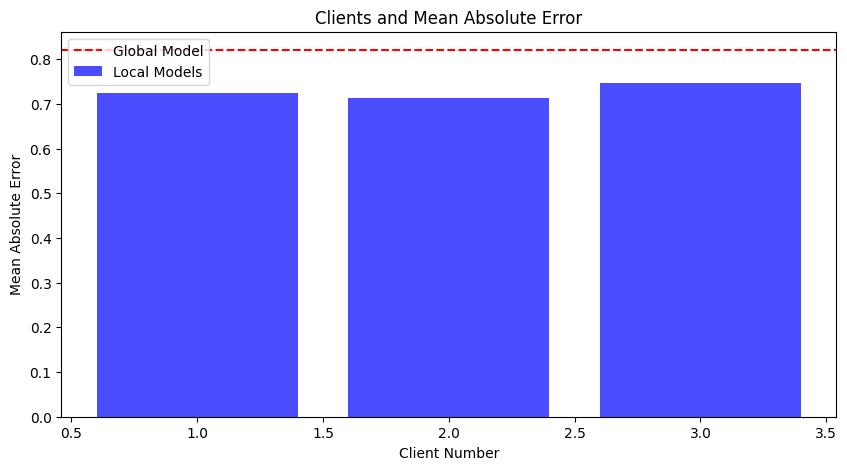

In [ ]:
clients = list(range(1, num_clients + 1))
final_maes = [maes[-1] for maes in client_mae.values()]
plt.figure(figsize=(10, 5))
plt.bar(clients, final_maes, color='blue', alpha=0.7, label='Local Models')
plt.axhline(y=global_maes[-1], color='r', linestyle='--', label='Global Model')
plt.xlabel('Client Number')
plt.ylabel('Mean Absolute Error')
plt.title('Clients and Mean Absolute Error')
plt.legend()
plt.show()


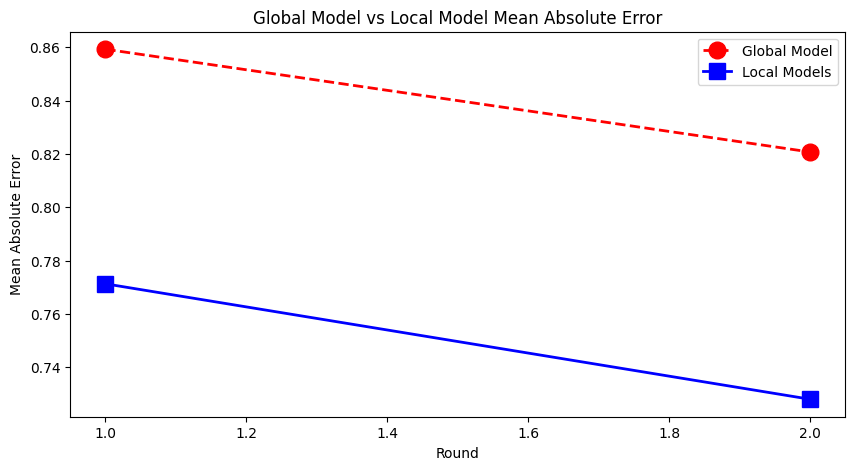

In [ ]:
import numpy as np  # Ensure that numpy is imported

rounds_list = list(range(1, rounds + 1))
plt.figure(figsize=(10, 5))

plt.plot(rounds_list, global_maes, color='red', marker='o', linestyle='dashed', linewidth=2, markersize=12, label='Global Model')

local_avg_mae = [np.mean([client_mae[client][i] for client in range(num_clients)]) for i in range(rounds)]
plt.plot(rounds_list, local_avg_mae, color='blue', marker='s', linestyle='solid', linewidth=2, markersize=12, label='Local Models')

plt.xlabel('Round')
plt.ylabel('Mean Absolute Error')
plt.title('Global Model vs Local Model Mean Absolute Error')
plt.legend()
plt.show()
